<a href="https://colab.research.google.com/github/raxyPro/azweblearn/blob/main/yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Historical Data:
                                  Open         High          Low        Close  \
Date                                                                            
1996-01-01 00:00:00+05:30     5.431588     5.748210     4.028649     4.683089   
1996-02-01 00:00:00+05:30     4.636721     6.490085     4.623474     5.613083   
1996-03-01 00:00:00+05:30     5.656800     6.305940     5.100393     5.480604   
1996-04-01 00:00:00+05:30     5.504449     6.955081     5.458082     6.482135   
1996-05-01 00:00:00+05:30     7.074311     7.151148     5.976070     6.315213   
...                                ...          ...          ...          ...   
2025-01-01 00:00:00+05:30  1214.849976  1326.000000  1211.599976  1265.099976   
2025-02-01 00:00:00+05:30  1265.099976  1290.500000  1193.300049  1200.099976   
2025-03-01 00:00:00+05:30  1204.000000  1307.699951  1156.000000  1275.099976   
2025-04-01 00:00:00+05:30  1264.599976  1412.400024  1114.849976  1405.000000   
2025-05-01

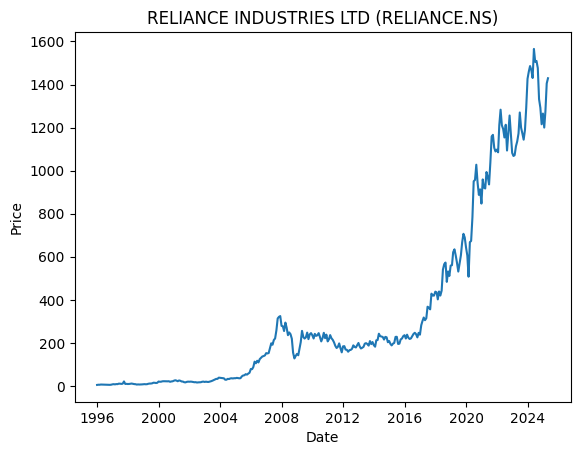

In [ ]:
#this API is working from collab note book but not from my laptop
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Create a Ticker object for a specific stock symbol
ticker = yf.Ticker("RELIANCE.NS")

info = ticker.info

# Get historical OHLC prices and other financial data
history = ticker.history(period="max", interval="1mo")
print("\nHistorical Data:")
print(history)


# Plot historical prices
plt.plot(history.index, history["Close"])
plt.title(f"{info['shortName']} ({info['symbol']})")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Get detailed information about the stock symbol
if 0:
  print("Detailed Information:")
  for key, value in info.items():
    # format and indent the printed output
    print(f"{key}: {value}")
    print("-" * 10)

In [ ]:
# prompt: in below code instead of reading data for 4 stock. read the data for each stock on lines list and calculation correlation

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


with open("x.txt", "r") as f:
    lines = f.readlines()

# Remove newline characters from each line
lines = [line.strip()+".NS" for line in lines]

# Print the list of lines
print(lines)

#lines = ["AAPL", "GOOG", "MSFT", "AMZN"]
data = {}

for line in lines:
    ticker = yf.Ticker(line)
    data[line] = ticker.history(period="1mo")

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(index=lines, columns=lines)
for i in range(len(lines)):
    for j in range(len(lines)):
        correlation_matrix.iloc[i, j] = data[lines[i]]["Close"].corr(data[lines[j]]["Close"])

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


In [ ]:
highest_correlation = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
highest_correlation = highest_correlation[highest_correlation != 1.0]
top_5_correlated = highest_correlation.index[:5].tolist()
print(top_5_correlated)

[('DIVISLAB.NS', 'DIVISLAB.NS'), ('M&M.NS', 'M&M.NS'), ('AXISBANK.NS', 'SBIN.NS'), ('SBIN.NS', 'AXISBANK.NS'), ('ICICIBANK.NS', 'AXISBANK.NS')]


In [ ]:
# prompt: save correlation_matrix to excel

correlation_matrix.to_excel("correlation_matrix.xlsx")


In [ ]:
# prompt: using the yf download last 1 year data for tcs.ns, infy.ns, hcltech.ns and wipro.ns these are 4 companies in IT Sector i want to see which two has most price co-relation

with open("x.txt", "r") as f:
    lines = f.readlines()

# Remove newline characters from each line
lines = [line.strip() for line in lines]

# Print the list of lines
print(lines)

import yfinance as yf
import pandas as pd
print("Downloading Data...")
# Download historical data for the last year for each company
tcs = yf.download("TCS.NS", period="1y")["Close"]
infy = yf.download("INFY.NS", period="1y")["Close"]
hcltech = yf.download("HCLTECH.NS", period="1y")["Close"]
wipro = yf.download("WIPRO.NS", period="1y")["Close"]


print("Checking correlation_matrix...")

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame({
    "TCS": tcs,
    "INFY": infy,
    "HCLTECH": hcltech,
    "WIPRO": wipro
}).corr()
print(correlation_matrix)

# Find the two companies with the highest correlation
highest_correlation = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
highest_correlation = highest_correlation[highest_correlation != 1.0]
top_2_correlated = highest_correlation.index[:2].tolist()

# Print the two companies with the highest correlation
print(f"The two companies with the highest price correlation are: {top_2_correlated}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Checking correlation_matrix...
              TCS      INFY   HCLTECH     WIPRO
TCS      1.000000  0.871482  0.938909  0.944199
INFY     0.871482  1.000000  0.894288  0.864307
HCLTECH  0.938909  0.894288  1.000000  0.916950
WIPRO    0.944199  0.864307  0.916950  1.000000
The two companies with the highest price correlation are: [('TCS', 'WIPRO'), ('TCS', 'HCLTECH')]


In [ ]:
correlation_matrix.unstack()

TCS      TCS        1.000000
         INFY       0.871482
         HCLTECH    0.938909
         WIPRO      0.944199
INFY     TCS        0.871482
         INFY       1.000000
         HCLTECH    0.894288
         WIPRO      0.864307
HCLTECH  TCS        0.938909
         INFY       0.894288
         HCLTECH    1.000000
         WIPRO      0.916950
WIPRO    TCS        0.944199
         INFY       0.864307
         HCLTECH    0.916950
         WIPRO      1.000000
dtype: float64

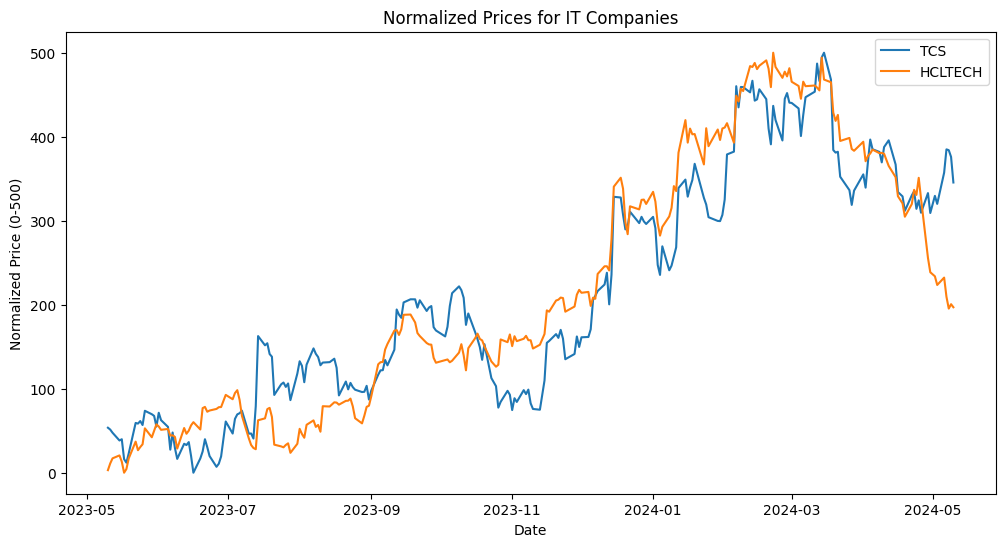

In [ ]:
# prompt: give me code the normailze the price from 0 to 500 and show all 4 chart in one pane

# Normalize the prices for each company
normalized_tcs = (tcs - tcs.min()) / (tcs.max() - tcs.min()) * 500
normalized_infy = (infy - infy.min()) / (infy.max() - infy.min()) * 500
normalized_hcltech = (hcltech - hcltech.min()) / (hcltech.max() - hcltech.min()) * 500
normalized_wipro = (wipro - wipro.min()) / (wipro.max() - wipro.min()) * 500

# Create a new DataFrame with the normalized prices
normalized_prices = pd.DataFrame({
    "TCS": normalized_tcs,

    "HCLTECH": normalized_hcltech

})

# Plot all 4 charts in one pane
plt.figure(figsize=(12, 6))
for company, price in normalized_prices.items():
    plt.plot(price.index, price, label=company)
plt.title("Normalized Prices for IT Companies")
plt.xlabel("Date")
plt.ylabel("Normalized Price (0-500)")
plt.legend()
plt.show()


In [ ]:
# prompt: how to send mail using gmail from collab

!pip install google-api-python-client google-auth-httplib2 google-auth-oauthlib
!pip install oauth2client

from googleapiclient.discovery import build
from google.oauth2.credentials import Credentials

# Load the credentials from the token file
credentials = Credentials.from_authorized_user_file('token.json', SCOPES)

# If the credentials are not valid, run the authentication flow
if not credentials or not credentials.valid:
    if credentials and credentials.expired and credentials.refresh_token:
        credentials.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'credentials.json', SCOPES)
        credentials = flow.run_local_server(port=0)

    # Save the credentials for the next run
    with open('token.json', 'w') as token:
        token.write(credentials.to_json())

# Create the Gmail service object
service = build('gmail', 'v1', credentials=credentials)

# Send the email
service.users().messages().send(
    userId='me',
    body={
        'raw': base64.urlsafe_b64encode(
            f"Subject: Test Email from Colab\n\nThis is a test email sent from Colab using the Gmail API.".encode()
        ).decode()
    }
).execute()

print('Email sent successfully!')


In [ ]:
# prompt: generate a code to get quote of reliance.ns for monthly weekly and daily historical price for 10 years and store the data into a single table
import pandas as pd
import yfinance as yf

# Get the historical data for Reliance.NS for the last 10 years
reliance = yf.download("RELIANCE.NS", period="10y")

# Get the monthly historical data
monthly_reliance = reliance.resample('BM').mean()

# Get the weekly historical data
weekly_reliance = reliance.resample('W').mean()

# Get the daily historical data
daily_reliance = reliance.resample('D').mean()

# Create a new DataFrame to store the combined data
combined_reliance = pd.DataFrame()

# Add the monthly, weekly, and daily data to the combined DataFrame
combined_reliance["Monthly"] = monthly_reliance["Close"]
combined_reliance["Weekly"] = weekly_reliance["Close"]
combined_reliance["Daily"] = daily_reliance["Close"]

# Print the combined DataFrame
print(combined_reliance)


[*********************100%%**********************]  1 of 1 completed

                Monthly  Weekly        Daily
Date                                        
2014-05-30   499.294237     NaN   486.745026
2014-06-30   489.288824     NaN   464.206726
2014-07-31   458.775793     NaN   460.115082
2014-08-29   453.719561     NaN          NaN
2014-09-30   454.627003     NaN   432.342224
...                 ...     ...          ...
2024-01-31  2695.995222     NaN  2853.250000
2024-02-29  2924.923805     NaN  2921.600098
2024-03-29  2926.699992     NaN          NaN
2024-04-30  2936.162488     NaN  2934.000000
2024-05-31  2847.982143     NaN          NaN

[121 rows x 3 columns]


In [ ]:
# prompt: write a code to download reliance.ns daily data for 5 years and calculate moving average for 20,50,100 and 200 days period also calculate RSI but for rsi write the code instead of calling a libary

import yfinance as yf
import numpy as np

# Download historical data for Reliance.NS for the last 5 years
reliance = yf.download("RELIANCE.NS", period="5y")

# Calculate the moving averages
reliance["20_Day_MA"] = reliance["Close"].rolling(window=20).mean()
reliance["50_Day_MA"] = reliance["Close"].rolling(window=50).mean()
reliance["100_Day_MA"] = reliance["Close"].rolling(window=100).mean()
reliance["200_Day_MA"] = reliance["Close"].rolling(window=200).mean()

# Calculate the RSI
def calculate_rsi(close_prices, time_period):
    """
    Calculates the Relative Strength Index (RSI) for a given list of closing prices.

    Args:
        close_prices: A list of closing prices.
        time_period: The time period for the RSI calculation.

    Returns:
        A list of RSI values.
    """

    # Calculate the price changes
    price_changes = np.diff(close_prices)

    # Calculate the absolute price changes
    absolute_price_changes = np.abs(price_changes)

    # Calculate the average gain and loss
    average_gain = np.sum(price_changes[price_changes > 0]) / time_period
    average_loss = np.sum(price_changes[price_changes < 0]) / time_period

    # Calculate the relative strength
    relative_strength = average_gain / average_loss

    # Calculate the RSI
    rsi = 100 - (100 / (1 + relative_strength))

    return rsi

reliance["RSI"] = calculate_rsi(reliance["Close"], time_period=14)

# Print the combined DataFrame
print(reliance)


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-05-10  1156.630859  1168.242920  1138.344238  1143.967407  1120.968506   
2019-05-13  1140.995850  1152.790649  1122.343384  1126.503662  1103.855591   
2019-05-14  1130.572388  1160.608276  1126.000732  1152.470703  1129.300659   
2019-05-15  1163.945557  1168.517212  1143.464478  1149.224731  1126.119995   
2019-05-16  1152.013550  1162.939819  1150.322021  1156.950928  1133.690674   
...                 ...          ...          ...          ...          ...   
2024-05-06  2871.000000  2880.000000  2836.000000  2839.050049  2839.050049   
2024-05-07  2831.949951  2841.500000  2784.000000  2802.949951  2802.949951   
2024-05-08  2795.000000  2865.899902  2795.000000  2837.100098  2837.100098   
2024-05-09  2826.000000  2847.500000  2780.000000  2788.250000  2788.250000   
2024-05-10  2793.500000  2820.000000  2776.149902  2

In [ ]:
reliance.iloc[:-1]

,Open,High,Low,Close,Adj Close,Volume,20_Day_MA,50_Day_MA,100_Day_MA,200_Day_MA,RSI
Date,,,,,,,,,,,
2019-05-10,1156.630859,1168.242920,1138.344238,1143.967407,1120.968506,12278715,NaN,NaN,NaN,NaN,945.0471
2019-05-13,1140.995850,1152.790649,1122.343384,1126.503662,1103.855591,8801829,NaN,NaN,NaN,NaN,945.0471
2019-05-14,1130.572388,1160.608276,1126.000732,1152.470703,1129.300659,14219117,NaN,NaN,NaN,NaN,945.0471
2019-05-15,1163.945557,1168.517212,1143.464478,1149.224731,1126.119995,12209779,NaN,NaN,NaN,NaN,945.0471
2019-05-16,1152.013550,1162.939819,1150.322021,1156.950928,1133.690674,7225654,NaN,NaN,NaN,NaN,945.0471
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-03,2942.000000,2949.899902,2832.300049,2868.000000,2868.000000,8613479,2929.044995,2933.621992,2804.222498,2611.660531,945.0471
2024-05-06,2871.000000,2880.000000,2836.000000,2839.050049,2839.050049,3697104,2923.837500,2931.979995,2808.235498,2613.233530,945.0471
2024-05-07,2831.949951,2841.500000,2784.000000,2802.949951,2802.949951,7258736,2917.692493,2929.078994,2811.653997,2614.489194,945.0471


In [ ]:
import yfinance as yf
import numpy as np

# Download historical data for Reliance.NS for the last 5 years
df = yf.download("RELIANCE.NS", period="1y")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-22,2247.504150,2276.117188,2245.058350,2265.964111,2257.987793,3717453
2023-05-23,2271.179199,2277.963135,2262.687500,2265.548828,2257.573975,3046017
2023-05-24,2257.564941,2274.271240,2246.073486,2252.349854,2244.421631,4056127
2023-05-25,2246.489014,2260.426270,2230.013428,2252.072998,2244.145752,5743931
2023-05-26,2268.733154,2315.806152,2262.041504,2313.498779,2305.355225,6313130
...,...,...,...,...,...,...
2024-05-15,2841.000000,2859.949951,2826.050049,2832.550049,2832.550049,2523267
2024-05-16,2837.100098,2855.000000,2796.050049,2850.699951,2850.699951,7355887
2024-05-17,2846.100098,2874.399902,2826.500000,2871.399902,2871.399902,5458238


In [ ]:
# prompt: Using dataframe df: i want to try an strategy, i will buy today when the price cross previous day high and keep the stock till it falls below the day high. this is an intraday strategy. run this strategy on the data frame and tell me how many trades i took and what is the PL. write full code please

import pandas as pd
import numpy as np

# Create a new column to store the previous day's high price
df['prev_day_high'] = df['High'].shift(1)

# Create a new column to store the buy signal
df['buy_signal'] = np.where(df['Open'] > df['prev_day_high'], 1, 0)

# Create a new column to store the sell signal
df['sell_signal'] = np.where(df['buy_signal'] == 1 and df['Low'] < df['Open'], 1, 0)

# Create a new column

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df.query("buy_signal==1")

,Open,High,Low,Close,Adj Close,Volume,prev_day_high,buy_signal,sell_signal
Date,,,,,,,,,
2023-05-26,2268.733154,2315.806152,2262.041504,2313.498779,2305.355225,6313130,2260.426270,1,1
2023-05-29,2326.882080,2335.189209,2314.144775,2326.512939,2318.323486,5005152,2315.806152,1,1
2023-06-08,2313.037109,2323.051758,2299.192139,2307.176025,2299.054688,6035554,2307.499268,1,1
2023-06-13,2302.884277,2329.143555,2294.807861,2326.743652,2318.553467,5624008,2297.530762,1,1
2023-06-19,2385.031250,2385.031250,2346.865234,2355.310547,2347.019775,3399277,2383.554443,1,1
2023-06-28,2319.498291,2342.434814,2305.514648,2334.727783,2326.509521,5677003,2316.267578,1,1
2023-06-30,2350.326416,2359.787109,2338.373535,2353.879883,2345.594238,5575777,2342.434814,1,1
2023-07-03,2361.079346,2420.105225,2358.587158,2414.290283,2405.791992,6077193,2359.787109,1,1
2023-07-04,2422.874268,2422.874268,2375.108887,2389.415527,2381.004639,4030821,2420.105225,1,1
